In [1]:
k =803

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [3]:
# Preprocessing
scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
latent_space =3 #6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 2000  #10000

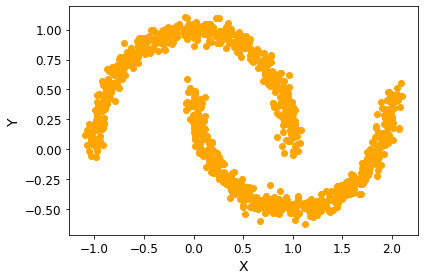

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [6]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(k, n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 4, 16)             80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 16)             64        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


Epoch 1/2000
Epoch 2/2000
Epoch 3/2000
Epoch 4/2000
Epoch 5/2000
Epoch 6/2000
Epoch 7/2000
Epoch 8/2000
Epoch 9/2000
Epoch 10/2000
Epoch 11/2000
Epoch 12/2000
Epoch 13/2000
Epoch 14/2000
Epoch 15/2000
Epoch 16/2000
Epoch 17/2000
Epoch 18/2000
Epoch 19/2000
Epoch 20/2000
Epoch 21/2000
Epoch 22/2000
Epoch 23/2000
Epoch 24/2000
Epoch 25/2000
Epoch 26/2000
Epoch 27/2000
Epoch 28/2000
Epoch 29/2000
Epoch 30/2000
Epoch 31/2000
Epoch 32/2000
Epoch 33/2000
Epoch 34/2000
Epoch 35/2000
Epoch 36/2000
Epoch 37/2000
Epoch 38/2000
Epoch 39/2000
Epoch 40/2000
Epoch 41/2000
Epoch 42/2000
Epoch 43/2000
Epoch 44/2000
Epoch 45/2000
Epoch 46/2000
Epoch 47/2000
Epoch 48/2000
Epoch 49/2000
Epoch 50/2000
Epoch 51/2000
Epoch 52/2000
Epoch 53/2000
Epoch 54/2000
Epoch 55/2000
Epoch 56/2000
Epoch 57/2000
Epoch 58/2000
Epoch 59/2000
Epoch 60/2000
Epoch 61/2000
Epoch 62/2000
Epoch 63/2000
Epoch 64/2000
Epoch 65/2000
Epoch 66/2000
Epoch 67/2000
Epoch 68/2000
Epoch 69/2000
Epoch 70/2000
Epoch 71/2000
Epoch 72/2000
E

Epoch 560/2000
Epoch 561/2000
Epoch 562/2000
Epoch 563/2000
Epoch 564/2000
Epoch 565/2000
Epoch 566/2000
Epoch 567/2000
Epoch 568/2000
Epoch 569/2000
Epoch 570/2000
Epoch 571/2000
Epoch 572/2000
Epoch 573/2000
Epoch 574/2000
Epoch 575/2000
Epoch 576/2000
Epoch 577/2000
Epoch 578/2000
Epoch 579/2000
Epoch 580/2000
Epoch 581/2000
Epoch 582/2000
Epoch 583/2000
Epoch 584/2000
Epoch 585/2000
Epoch 586/2000
Epoch 587/2000
Epoch 588/2000
Epoch 589/2000
Epoch 590/2000
Epoch 591/2000
Epoch 592/2000
Epoch 593/2000
Epoch 594/2000
Epoch 595/2000
Epoch 596/2000
Epoch 597/2000
Epoch 598/2000
Epoch 599/2000
Epoch 600/2000
Epoch 601/2000
Epoch 602/2000
Epoch 603/2000
Epoch 604/2000
Epoch 605/2000
Epoch 606/2000
Epoch 607/2000
Epoch 608/2000
Epoch 609/2000
Epoch 610/2000
Epoch 611/2000
Epoch 612/2000
Epoch 613/2000
Epoch 614/2000
Epoch 615/2000
Epoch 616/2000
Epoch 617/2000
Epoch 618/2000
Epoch 619/2000
Epoch 620/2000
Epoch 621/2000
Epoch 622/2000
Epoch 623/2000
Epoch 624/2000
Epoch 625/2000
Epoch 626/

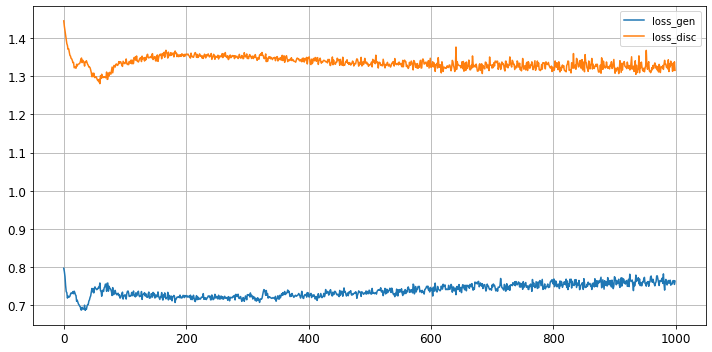

Predicted Values: (1000, 2)
save latent space


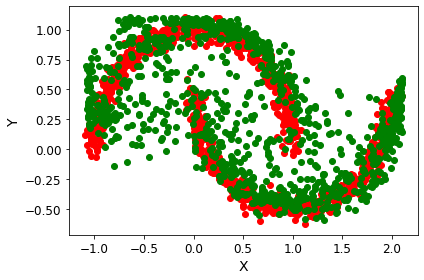

save countour line


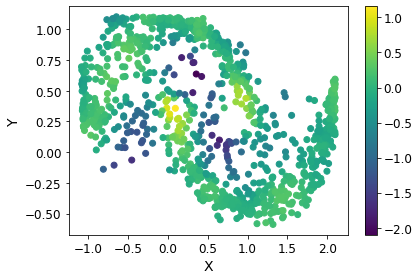

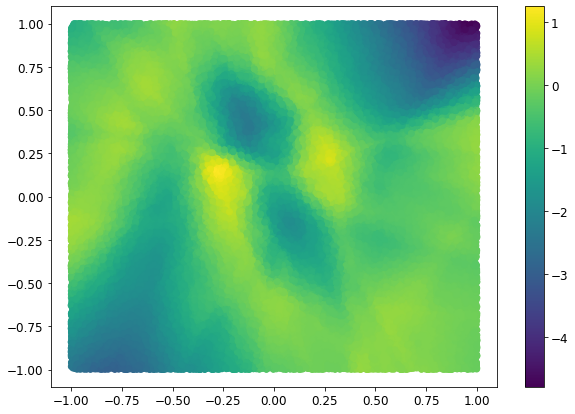

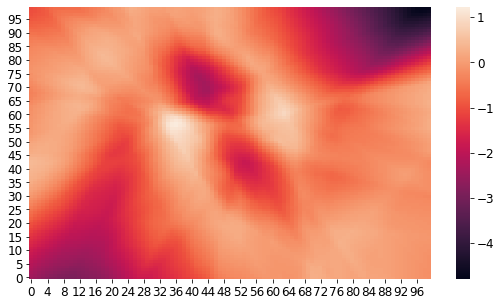

Epoch 1001/2000
Epoch 1002/2000
Epoch 1003/2000
Epoch 1004/2000
Epoch 1005/2000
Epoch 1006/2000
Epoch 1007/2000
Epoch 1008/2000
Epoch 1009/2000
Epoch 1010/2000
Epoch 1011/2000
Epoch 1012/2000
Epoch 1013/2000
Epoch 1014/2000
Epoch 1015/2000
Epoch 1016/2000
Epoch 1017/2000
Epoch 1018/2000
Epoch 1019/2000
Epoch 1020/2000
Epoch 1021/2000
Epoch 1022/2000
Epoch 1023/2000
Epoch 1024/2000
Epoch 1025/2000
Epoch 1026/2000
Epoch 1027/2000
Epoch 1028/2000
Epoch 1029/2000
Epoch 1030/2000
Epoch 1031/2000
Epoch 1032/2000
Epoch 1033/2000
Epoch 1034/2000
Epoch 1035/2000
Epoch 1036/2000
Epoch 1037/2000
Epoch 1038/2000
Epoch 1039/2000
Epoch 1040/2000
Epoch 1041/2000
Epoch 1042/2000
Epoch 1043/2000
Epoch 1044/2000
Epoch 1045/2000
Epoch 1046/2000
Epoch 1047/2000
Epoch 1048/2000
Epoch 1049/2000
Epoch 1050/2000
Epoch 1051/2000
Epoch 1052/2000
Epoch 1053/2000
Epoch 1054/2000
Epoch 1055/2000
Epoch 1056/2000
Epoch 1057/2000
Epoch 1058/2000
Epoch 1059/2000
Epoch 1060/2000
Epoch 1061/2000
Epoch 1062/2000
Epoch 10

Epoch 1519/2000
Epoch 1520/2000
Epoch 1521/2000
Epoch 1522/2000
Epoch 1523/2000
Epoch 1524/2000
Epoch 1525/2000
Epoch 1526/2000
Epoch 1527/2000
Epoch 1528/2000
Epoch 1529/2000
Epoch 1530/2000
Epoch 1531/2000
Epoch 1532/2000
Epoch 1533/2000
Epoch 1534/2000
Epoch 1535/2000
Epoch 1536/2000
Epoch 1537/2000
Epoch 1538/2000
Epoch 1539/2000
Epoch 1540/2000
Epoch 1541/2000
Epoch 1542/2000
Epoch 1543/2000
Epoch 1544/2000
Epoch 1545/2000
Epoch 1546/2000
Epoch 1547/2000
Epoch 1548/2000
Epoch 1549/2000
Epoch 1550/2000
Epoch 1551/2000
Epoch 1552/2000
Epoch 1553/2000
Epoch 1554/2000
Epoch 1555/2000
Epoch 1556/2000
Epoch 1557/2000
Epoch 1558/2000
Epoch 1559/2000
Epoch 1560/2000
Epoch 1561/2000
Epoch 1562/2000
Epoch 1563/2000
Epoch 1564/2000
Epoch 1565/2000
Epoch 1566/2000
Epoch 1567/2000
Epoch 1568/2000
Epoch 1569/2000
Epoch 1570/2000
Epoch 1571/2000
Epoch 1572/2000
Epoch 1573/2000
Epoch 1574/2000
Epoch 1575/2000
Epoch 1576/2000
Epoch 1577/2000
Epoch 1578/2000
Epoch 1579/2000
Epoch 1580/2000
Epoch 15

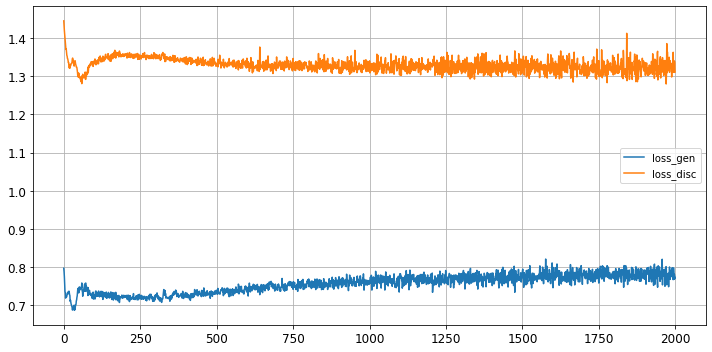

Predicted Values: (1000, 2)
save latent space


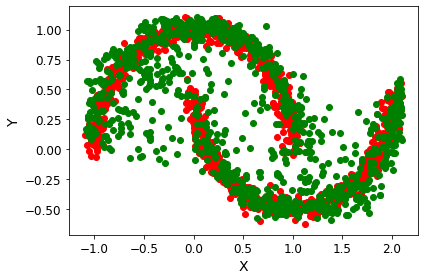

save countour line


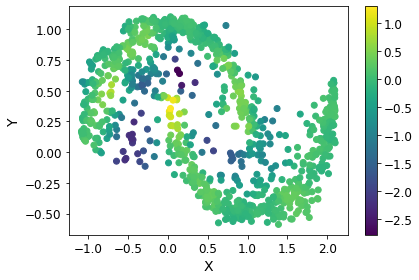

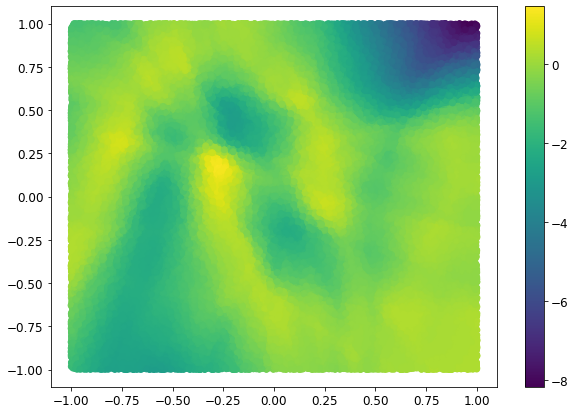

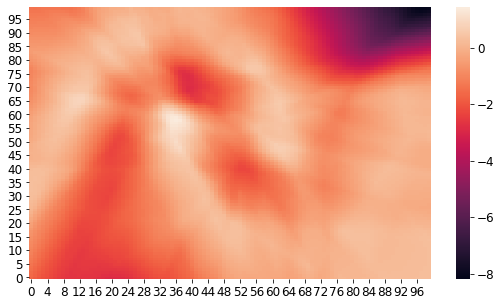

In [8]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [9]:
k = 1
epoch = 8000

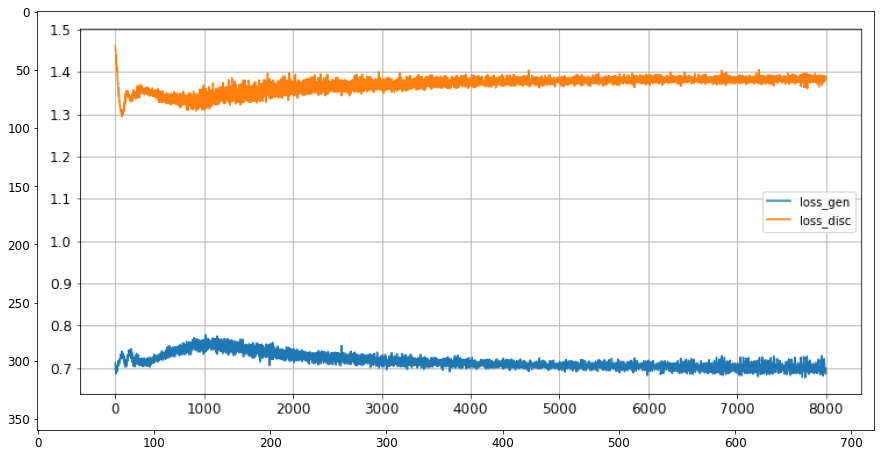

In [10]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

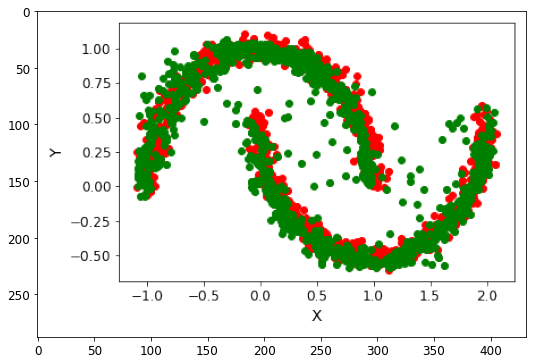

In [11]:
#Discriminator Loss
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)
    

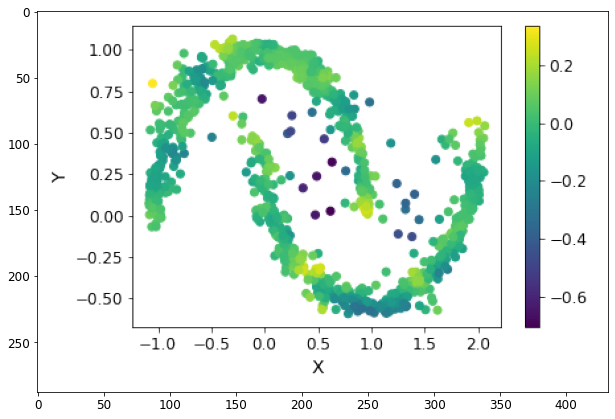

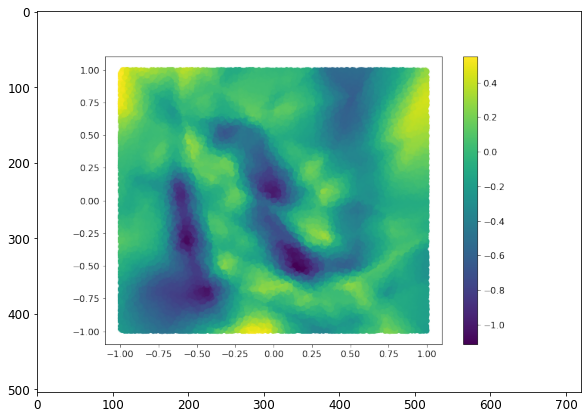

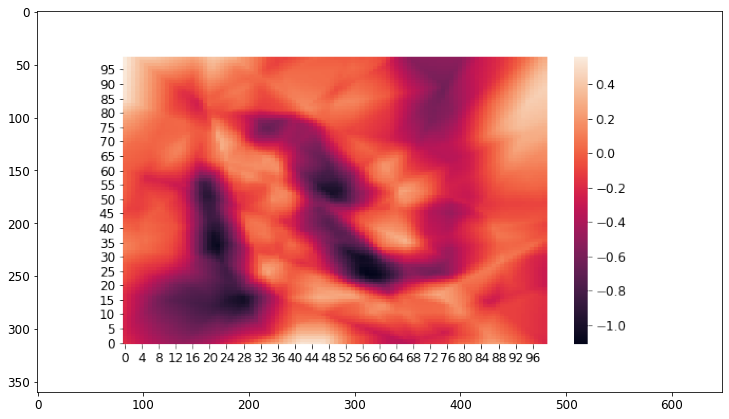

In [12]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

countour_mesh = Image.open('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

countour_heat = Image.open('GANS/Result/'+'heatmap_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour heat",figsize=[18,7])
plt.imshow(countour_heat)

### Applying the prediction function

## Fixed Input

input_test : (700, 2)


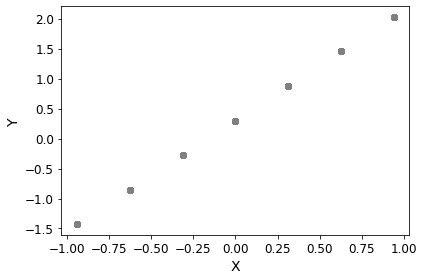

In [13]:
# define these for desired prediction
x_input = [-1.0,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [14]:
X_generated = dcgan.predict(input_test, scaler)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

Generated Data: (699, 2)


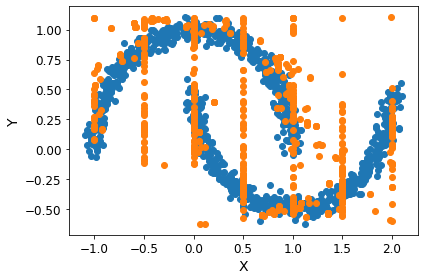

In [15]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.savefig('GANS/Result/'+'prediction_v'+str(k)+'_epochs'+str(epoch+1)+'.png')
    plt.tight_layout()